In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os

In [2]:
#Chemins vers le répertoire courant, les sources de données et le répertoire donnant accès aux soumissions
_REP_PATH_ = os.getcwd()
_REP_DATA_PATH_ = _REP_PATH_+'/data/'
_REP_OUT_PATH_ = _REP_PATH_ + '/output/'

In [3]:
data=pd.read_csv(_REP_DATA_PATH_ + "train.csv")
data

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']


In [5]:
X_test=pd.read_csv(_REP_DATA_PATH_ + "test.csv")

In [6]:
#Supprimer les colonnes d'identification
X_test=X_test.drop(columns=["row_ID"])
X_train=X_train.drop(columns=['Unnamed: 0'])

# Evaluation sur un ensemble de validation du paramètre du nombre de voisins optimal

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [8]:
neighbors = np.arange(4, 10)



# Ensembles d'entrainement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, 
                                                    random_state=42)



On s'assure ici que les classes soient présentes dans les données d'entrainement et de validation dans les mêmes proportions. Ce qui est normalement le cas grâce au paramètre `shuffle`.

In [10]:
y_train.value_counts()

Cover_Type
2    36440
1    27354
3     4733
7     2697
6     2205
5     1195
4      376
Name: count, dtype: int64

In [11]:
y_val.value_counts()

Cover_Type
2    12236
1     9056
3     1540
7      871
6      762
5      440
4       95
Name: count, dtype: int64

In [12]:
def plot_complexity_curve(k_list, knn_model, X_train, X_val, y_train, y_val):
    
    train_scores = []
    test_scores = []
    
    
    for k in k_list:
        
        knn = knn_model(k)
        
        knn.fit(X_train, y_train)
        
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_val, y_val))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

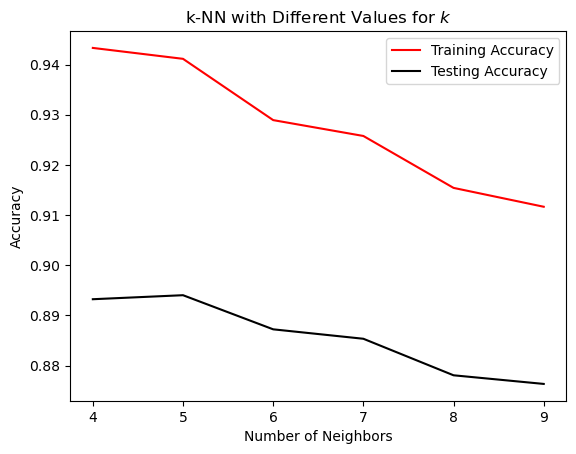

In [13]:
plot_complexity_curve(neighbors, KNeighborsClassifier, 
                    X_train, X_val, y_train, y_val)

In [14]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']
X_train=X_train.drop(columns=['Unnamed: 0'])

# Implémentation de la méthode K Nearest Neighbors

Suite à cette phase d'évalutaion, nous décidons de paramétrer un nombre de voisins supérieur à 3 dû au graphe UMAP(présenté dans le rapport et qui donne une idée de la structure sous-jacente des données).
Cependant, nous choissisons un nombre de voisins pas trop grand, suite à notre plot obtenu sur l'ensemble de validation, dont les proportions de classes sont quasi similaires à celles des données d'entrainement et sûrement celles de test(hypothèses suite à l'analyse de données), et nous choisissons `n_neighbors = 5`

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
import time
start = time.time()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print("temps d'exécution  " + str(time.time() - start))

temps d'exécution  1029.6216695308685


Une méthode assez coûteuse en temps...

In [20]:
submission_df = pd.DataFrame({
    'row_ID': X_test.index,   
    'Cover_Type': y_pred      
})

submission_df.to_csv(_REP_OUT_PATH_ + 'prediction_fct_knn.csv', index=False)